In [1]:
import pandas as pd
import requests
import json
from pprint import pprint

# API Яндекс.Метрики

Итак, мы будем использовать следующие параметры запроса:

- metrics — метрики, то есть количественные показатели, характеризующие посетителей сайта;
- dimensions — группировки, определяющие, по каким критериям все посетители сайта будут объединены в группы;
- date1 — начало периода, данные по которому будут помещены в отчет;
- date2 — окончание периода, данные по которому будут помещены в отчет; 
- limit — максимально допустимое количество строк в отчёте;
- offset — номер строки отчёта, с которой должна начаться выгрузка данных;
- ids — номер счётчика, установленный на сайте.

Примеры метрик:

- ym:s:visits — количество визитов;
- ym:s:pageviews — суммарное количество просмотров страниц;
- ym:s:users — количество уникальных посетителей (за отчетный период);
- ym:s:bounceRate — показатель отказов;
- ym:s:pageDepth — глубина просмотра;
- ym:s:avgVisitDurationSeconds — средняя продолжительность визитов в секундах. 

Примеры группировок:

- ym:s:date — дата;
- ym:s:< attribution >SearchEngine> — поисковая система;
- ym:s:< attribution >SearchPhrase> — поисковый запрос;
- ym:s:startURL — посадочная страница.

Мы видим, что в некоторых группировках содержится параметр < attribution >. Это означает, что при использовании таких группировок нужно задать атрибуцию трафика — информацию о том, как сессии пользователей будут привязываться к источнику трафика. Например, если мы поставили атрибуцию по последнему источнику, то к конкретному источнику в отчете будут отнесены сессии посетителей, у которых этот источник был последним. Существует несколько типов атрибуции трафика:

- first — атрибуция по первому источнику; 
- last — атрибуция по последнему источнику; 
- prev — атрибуция по предыдущему источнику; 
- lastSign — атрибуция по последнему значимому источнику (значимым считается любой источник, отличный от прямых и внутренних переходов).

Пример:

In [2]:
params = {'metrics': 'ym:s:visits,ym:s:pageviews',
          'dimensions': 'ym:s:referer',
          'date1': '2019-06-01',
          'date2': 'yesterday',
          'limit': 10000,
          'ids': 30177909}

### Задание 1

Создайте словарь params, содержащий параметры запроса для определения количества уникальных посетителей (ym:s:users) из разных стран (ym:s:regionCountry) за период с 1 по 31 января 2019 года включительно. Не используйте в запросе параметры limit и offset, но при этом не забудьте задать правильный ID счётчика.

In [3]:
params = {'metrics': 'ym:s:users',
          'dimensions': 'ym:s:regionCountry',
          'date1': '2019-01-01',
          'date2': '2019-01-31',
          'ids': 30177909}

### Задание 2

Создайте словарь params, содержащий параметры запроса для определения количества новых пользователей (ym:s:newUsers) с разбивкой их по дням недели, когда совершен визит (ym:s:dayOfWeek) и по типу устройства, с которого было посещение (ym:s:deviceCategory) за март 2019 года. Не используйте в запросе параметры limit и offset, но при этом не забудьте задать правильный ID счётчика.

In [4]:
params = {'metrics': 'ym:s:newUsers',
          'dimensions': 'ym:s:dayOfWeek,ym:s:deviceCategory',
          'date1': '2019-03-01',
          'date2': '2019-03-31',
          'ids': 30177909}

### Задание 3

Создайте словарь params, содержащий параметры запроса для определения средней продолжительности визита (ym:s:avgVisitDurationSeconds) и количества просмотренных страниц (ym:s:pageviews) в разные дни (ym:s:date) в зависимости от языка браузера (ym:s:browserLanguage) за прошедшие 5 дней (5daysAgo) и до сегодняшнего дня включительно. Не используйте в запросе параметры limit и offset, но при этом не забудьте задать правильный ID счётчика.

In [5]:
params = {'metrics': 'ym:s:avgVisitDurationSeconds,ym:s:pageviews',
          'dimensions': 'ym:s:date,ym:s:browserLanguage',
          'date1': '5daysAgo',
          'date2': 'today',
          'ids': 30177909}

# Получение и анализ данных

In [6]:
token = 'y0_AgAAAAAHomzuAAhdQQAAAADNZIzHZvIzmS2bQqOwyNPxmvpaGDHe954'

In [7]:
headers = {'Authorization': 'OAuth ' + token}

params = {'metrics': 'ym:s:visits,ym:s:pageviews', 
          'dimensions': 'ym:s:referer',  
          'date1': '2019-06-01',  
          'date2': '2019-06-10',     
          'ids': 30177909}

In [8]:
response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params = params, headers = headers)

In [9]:
response.status_code

200

In [4]:
metrika_data = response.json()

metrika_data

{'query': {'ids': [30177909],
  'dimensions': ['ym:s:referer'],
  'metrics': ['ym:s:visits', 'ym:s:pageviews'],
  'sort': ['-ym:s:visits'],
  'date1': '2019-06-01',
  'date2': '2019-06-10',
  'limit': 100,
  'offset': 1,
  'group': 'Week',
  'auto_group_size': '1',
  'attr_name': '',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'adfox_event_id': '0'},
 'data': [{'dimensions': [{'name': 'https://google.com/',
     'favicon': 'google.com'}],
   'metrics': [384.0, 444.0]},
  {'dimensions': [{'name': 'https://yandex.ru/', 'favicon': 'yandex.ru'}],
   'metrics': [128.0, 146.0]},
  {'dimensions': [{'name': 'https://google.ru/', 'favicon': 'google.ru'}],
   'metrics': [59.0, 65.0]},
  {'dimensions': [{'name': 'http://google.com/', 'favicon': 'google.com'}],
   'metrics': [10.0, 10.0]},
  {'dimensions': [{'name': 'http://toolmark.ru/sokrovichica-analitika/',
     'favicon': 'toolmark.ru'}],
   'metrics': [8.0, 13.0]},
  {'dimensions': [{'nam

In [5]:
metrika_data.keys()

dict_keys(['query', 'data', 'total_rows', 'total_rows_rounded', 'sampled', 'contains_sensitive_data', 'sample_share', 'sample_size', 'sample_space', 'data_lag', 'totals', 'min', 'max'])

In [6]:
metrika_data['total_rows']

112

In [7]:
metrika_data['total_rows_rounded']

False

In [8]:
metrika_data['data']

[{'dimensions': [{'name': 'https://google.com/', 'favicon': 'google.com'}],
  'metrics': [384.0, 444.0]},
 {'dimensions': [{'name': 'https://yandex.ru/', 'favicon': 'yandex.ru'}],
  'metrics': [128.0, 146.0]},
 {'dimensions': [{'name': 'https://google.ru/', 'favicon': 'google.ru'}],
  'metrics': [59.0, 65.0]},
 {'dimensions': [{'name': 'http://google.com/', 'favicon': 'google.com'}],
  'metrics': [10.0, 10.0]},
 {'dimensions': [{'name': 'http://toolmark.ru/sokrovichica-analitika/',
    'favicon': 'toolmark.ru'}],
  'metrics': [8.0, 13.0]},
 {'dimensions': [{'name': 'https://yandex.kz/', 'favicon': 'yandex.kz'}],
  'metrics': [8.0, 11.0]},
 {'dimensions': [{'name': 'https://yandex.by/', 'favicon': 'yandex.by'}],
  'metrics': [5.0, 5.0]},
 {'dimensions': [{'name': 'android-app://org.telegram.messenger',
    'favicon': 'android-app'}],
  'metrics': [4.0, 7.0]},
 {'dimensions': [{'name': 'https://seonews.ru/', 'favicon': 'seonews.ru'}],
  'metrics': [4.0, 5.0]},
 {'dimensions': [{'name': '

### Задание 1

Какое максимальное количество визитов из одного источника было зафиксировано в отчёте?

In [9]:
metrika_data['data'][0]['metrics'][0]

384.0

### Задание 2

Из какого источника было совершено максимальное количество визитов на сайт в исследованный период времени?

In [10]:
metrika_data['data'][0]['dimensions'][0]['name']

'https://google.com/'

### Задание 4

Для скольких источников в рассмотренный период зафиксирован только один просмотр?

In [11]:
counter = 0
for i in range(len(metrika_data['data'])):
    if metrika_data['data'][i]['metrics'][1] == 1:
        counter += 1 
    
counter

64

# Работа со структурой отчёта

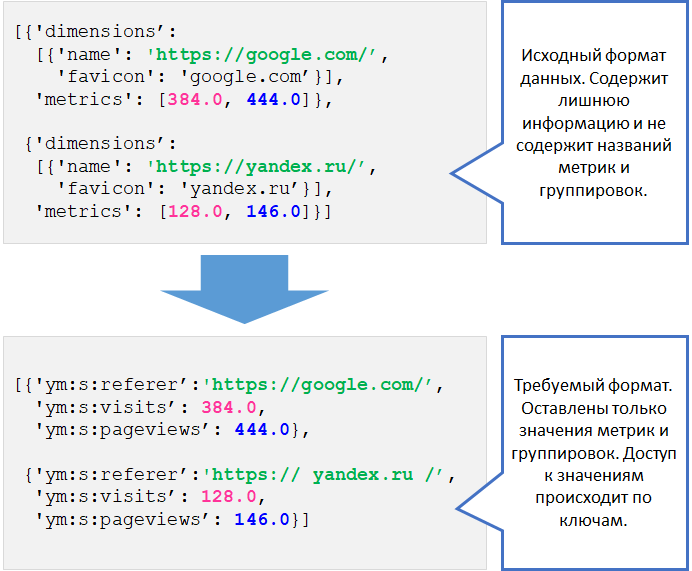

In [12]:
token = 'y0_AgAAAAAHomzuAAhdQQAAAADNZIzHZvIzmS2bQqOwyNPxmvpaGDHe954'

url = 'https://api-metrika.yandex.net/stat/v1/data'

headers = {'Authorization': 'OAuth ' + token}

params = {'metrics': 'ym:s:visits,ym:s:pageviews', 
          'dimensions': 'ym:s:referer',  
          'date1': '2019-06-01',  
          'date2': '2019-06-10',     
          'ids': 30177909}

In [13]:
response = requests.get(url, params = params, headers = headers)
data = response.json()

clear_data = []

dictt_example = {}


lst = data['query']['dimensions']
for i in lst:
    dictt_example[i] = 0
    
lst = data['query']['metrics']
for i in lst:
    dictt_example[i] = 0
    
    
for i in range(len(data['data'])):
    
    dictt = dictt_example.copy()
    
    for n in dictt.keys():
        if dictt[n] == 0:
            dictt_example[n] = data['data'][i]['dimensions'][0]['name']
            break
    for n in dictt.keys():
        for f in range(len(data['data'][i]['metrics'])):
            if dictt[n] == 0:
                dictt_example[n] = data['data'][i]['metrics'][f]
                break
        clear_data.append(dictt_example)

data

{'query': {'ids': [30177909],
  'dimensions': ['ym:s:referer'],
  'metrics': ['ym:s:visits', 'ym:s:pageviews'],
  'sort': ['-ym:s:visits'],
  'date1': '2019-06-01',
  'date2': '2019-06-10',
  'limit': 100,
  'offset': 1,
  'group': 'Week',
  'auto_group_size': '1',
  'attr_name': '',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'adfox_event_id': '0'},
 'data': [{'dimensions': [{'name': 'https://google.com/',
     'favicon': 'google.com'}],
   'metrics': [384.0, 444.0]},
  {'dimensions': [{'name': 'https://yandex.ru/', 'favicon': 'yandex.ru'}],
   'metrics': [128.0, 146.0]},
  {'dimensions': [{'name': 'https://google.ru/', 'favicon': 'google.ru'}],
   'metrics': [59.0, 65.0]},
  {'dimensions': [{'name': 'http://google.com/', 'favicon': 'google.com'}],
   'metrics': [10.0, 10.0]},
  {'dimensions': [{'name': 'http://toolmark.ru/sokrovichica-analitika/',
     'favicon': 'toolmark.ru'}],
   'metrics': [8.0, 13.0]},
  {'dimensions': [{'nam

In [14]:
clear_data = []

for data_item in metrika_data['data']:
    
    new_dict = {}  

    for i,dimension in enumerate(data_item['dimensions']):
        new_dict[metrika_data['query']['dimensions'][i]] = dimension['name']
        
    for i,metric in enumerate(data_item['metrics']):
        new_dict[metrika_data['query']['metrics'][i]] = metric
        
    clear_data.append(new_dict)
    
clear_data

[{'ym:s:referer': 'https://google.com/',
  'ym:s:visits': 384.0,
  'ym:s:pageviews': 444.0},
 {'ym:s:referer': 'https://yandex.ru/',
  'ym:s:visits': 128.0,
  'ym:s:pageviews': 146.0},
 {'ym:s:referer': 'https://google.ru/',
  'ym:s:visits': 59.0,
  'ym:s:pageviews': 65.0},
 {'ym:s:referer': 'http://google.com/',
  'ym:s:visits': 10.0,
  'ym:s:pageviews': 10.0},
 {'ym:s:referer': 'http://toolmark.ru/sokrovichica-analitika/',
  'ym:s:visits': 8.0,
  'ym:s:pageviews': 13.0},
 {'ym:s:referer': 'https://yandex.kz/',
  'ym:s:visits': 8.0,
  'ym:s:pageviews': 11.0},
 {'ym:s:referer': 'https://yandex.by/',
  'ym:s:visits': 5.0,
  'ym:s:pageviews': 5.0},
 {'ym:s:referer': 'android-app://org.telegram.messenger',
  'ym:s:visits': 4.0,
  'ym:s:pageviews': 7.0},
 {'ym:s:referer': 'https://seonews.ru/',
  'ym:s:visits': 4.0,
  'ym:s:pageviews': 5.0},
 {'ym:s:referer': 'https://yandex.ua/',
  'ym:s:visits': 4.0,
  'ym:s:pageviews': 5.0},
 {'ym:s:referer': 'http://allmetrics.ru/threads/instrumenty-dl

### Задание 1

Посчитайте среднесуточное количество пользователей за май 2019 года. Для того чтобы выгрузить данные по дням, используйте группировку ym:s:date, для получения количества пользователей используйте метрику ym:s:users. В ответе укажите число с округлением до 2 знаков после запятой.

In [15]:
params = {
    'dimensions':'ym:s:date',
    'metrics':'ym:s:users',
    'date1':'2019-05-01',
    'date2':'2019-05-31',
    'ids': 30177909
}
response = requests.get(url, params = params, headers = headers)

data = response.json()

sum([data['data'][x]['metrics'][0] for x in range(len(data['data']))])/len(data['data'])

75.83870967741936

### Задание 2

Проанализируйте сумму посещений (ym:s:visits) по ключевым словам (группировка ym:s:lastSearchPhrase) за май 2019 года. Сколько посещений содержит в себе подстроку 'python'? Учитывайте, что в ключевых фразах Python может писаться с большой буквы, но при подсчёте надо игнорировать регистр символов

In [16]:
params = {
    'dimensions':'ym:s:lastSearchPhrase',
    'metrics':'ym:s:visits',
    'date1':'2019-05-01',
    'date2':'2019-05-31',
    'ids': 30177909
}
response = requests.get(url, params = params, headers = headers)

data = response.json()

dictt = {}

for i in data['data']:
    dictt[i['dimensions'][0]['name']] = i['metrics'][0]

quantity = 0
    
for key, value in dictt.items():
    if 'python' in key.lower():
        quantity += value

quantity

33.0

### Задание 3

Посчитайте, на сколько процентов уменьшилось число посещений (ym:s:visits) в мае 2019 относительно апреля 2019, где страница входа (группировка ym:s:startURL) соответствует странице 'http://datalytics.ru/all/stanovyas-guru-api-yandeks-metriki/'. Месяц можно получить, используя группировку ym:s:month. Ответ дайте целых числом (без указания знака "минус")

In [17]:
params = {
    'dimensions':'ym:s:startURL,ym:s:month',
    'metrics':'ym:s:visits',
    'date1':'2019-04-01',
    'date2':'2019-05-31',
    'ids':30177909
}

response = requests.get(url,params=params,headers=headers)
data = response.json()

lst = []

for i in data['data']:
    if i['dimensions'][0]['name'] == 'http://datalytics.ru/all/stanovyas-guru-api-yandeks-metriki/':
        lst.append(i)
        
lst

[{'dimensions': [{'name': 'http://datalytics.ru/all/stanovyas-guru-api-yandeks-metriki/',
    'favicon': 'datalytics.ru'},
   {'name': '4'}],
  'metrics': [367.0]},
 {'dimensions': [{'name': 'http://datalytics.ru/all/stanovyas-guru-api-yandeks-metriki/',
    'favicon': 'datalytics.ru'},
   {'name': '5'}],
  'metrics': [279.0]}]

In [18]:
100*(lst[0]['metrics'][0] - lst[1]['metrics'][0])/(lst[0]['metrics'][0])

23.978201634877383

# Aвтоматический запуск скриптов

In [20]:
!pip install schedule 

In [21]:
import time
import schedule

In [22]:
def task():
    print('Hello, I am task!')

In [23]:
schedule.every(15).seconds.do(task) 

Every 15 seconds do task() (last run: [never], next run: 2022-10-28 13:34:52)

In [24]:
while True:  
    schedule.run_pending()  
    time.sleep(1)

Hello, I am task!
Hello, I am task!


KeyboardInterrupt: 

# API KudaGO

In [25]:
import datetime  

In [26]:
url = 'https://kudago.com/public-api/v1.4/events/'  
params = '?order_by=-publication_date&page_size=100&location=msk&fields=id,title,dates,description,price,site_url'  
response = requests.get(url+params)  
results = response.json()['results']

In [27]:
results

[{'id': 200679,
  'dates': [{'start': 1671307200, 'end': 1671307200}],
  'title': 'концерт pyrokinesis в клубе Adrenaline Stadium',
  'description': '<p>Рэп-звезда pyrokinesis отметит день рождения грандиозным московским шоу с хитами и премьерами.</p>',
  'price': 'от 2090 рублей',
  'site_url': 'https://kudago.com/msk/event/kontsert-pyrokinesis-adrenaline/'},
 {'id': 200606,
  'dates': [{'start': 1669564800, 'end': 1669570200}],
  'title': 'концерт «Вивальди: все органные концерты»',
  'description': '<p><a class="external-link" href="https://collegiummusicum.ru/concerts/event/calendar_event/8005795?utm_campaign=kudago" rel="nofollow" target="_blank"><strong>Шедевры Вивальди</strong></a> прозвучат в стенах собора Петра и Павла в исполнении органа, деревянных духовых и старинных музыкальных инструментов. </p>',
  'price': 'от 1400 до 2600 рублей',
  'site_url': 'https://kudago.com/msk/event/kontsert-vivaldi-vse-organnyie-kontsertyi/'},
 {'id': 200681,
  'dates': [{'start': 1666818000, 

# Создание датафрейма

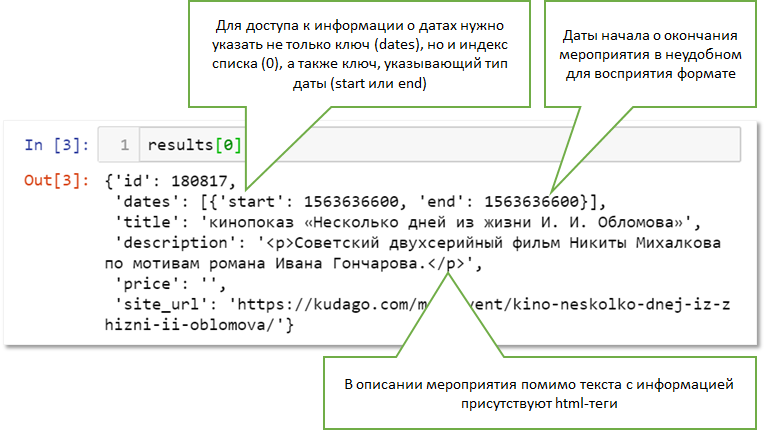

### Задание 1

Создайте функцию clear_description(description), которая принимает на входе строковую величину — описание мероприятия, включающее теги начала и окончания абзаца, а возвращает тот же текст без тегов.

In [28]:
def clear_description(description):
    return description.replace('<p>','').replace('</p>','')

In [29]:
clear_description('<p>Спектакль-антиутопия по роману Дмитрия Данилова о мире будущего, где действует «режим общей гуманизации».</p>')

'Спектакль-антиутопия по роману Дмитрия Данилова о мире будущего, где действует «режим общей гуманизации».'

Работаем с датами

Итак, давайте займёмся преобразованием дат начала и окончания мероприятия из формата Unixtime в формат Datetime (для отслеживания актуальности мероприятия) и в строковый формат (для хранения информации в датафрейме). Для преобразования Unixtime-даты в местное время мы воспользуемся методом fromtimestamp() из модуля datetime библиотеки datetime. Попробуем применить этот метод к дате начала события, стоящего на первой позиции в списке results (обратите внимание, что в вашем случае дата события, скорее всего, будет другой):

In [30]:
startdate_dt = datetime.datetime.fromtimestamp(results[0]['dates'][0]['start']).strftime('%d-%m-%Y')

startdate_dt

'17-12-2022'

In [31]:
def find_dates(event):
    if event['dates'][0]['start'] < 0:
        startdate_dt = datetime.datetime.fromtimestamp(event['dates'][0]['end'])
    else:
        startdate_dt = datetime.datetime.fromtimestamp(event['dates'][0]['start'])
    enddate_dt = datetime.datetime.fromtimestamp(event['dates'][0]['end'])
    startdate_txt = startdate_dt.strftime('%d-%m-%Y')
    enddate_txt = enddate_dt.strftime('%d-%m-%Y')
    return startdate_dt, enddate_dt, startdate_txt, enddate_txt

In [32]:
find_dates(results[0])

(datetime.datetime(2022, 12, 17, 23, 0),
 datetime.datetime(2022, 12, 17, 23, 0),
 '17-12-2022',
 '17-12-2022')

In [33]:
df = pd.DataFrame(columns = 'id title description price start_date end_date url'.split()) 

for event in results:      
    
    start_dt, end_dt, _, _ = find_dates(event)  
    
    now = datetime.datetime.now()  
    
    if (start_dt - now).days < 7 and end_dt > now:  
        new_row = pd.DataFrame([fill_df(event).values()], columns=df.columns)
        df = pd.concat([df, new_row], ignore_index = True) 
        
df

NameError: name 'fill_df' is not defined

### Задание 3

Создайте функцию fill_df(event), которая принимает словарь, описывающий мероприятие в формате API KudaGo, а возвращает словарь, который можно будет добавить в новую строку создаваемого датафрейма

Важно!

Обратите внимание, что внутри функции fill_df() должны вызываться две уже созданные нами функции: clear_description() и find_dates(). Для корректной проверки кода необходимо добавить код обеих функций в поле для ответа вместе с функцией fill_df(). Таким образом, вам необходимо поместить в поле для ответа код трёх функций: clear_description(), find_dates() и fill_df().

In [ ]:
results[0]

In [ ]:
def fill_df(event):
    
    new_dict = {}
    
    for key,value in event.items():
        if key != 'dates' and key != 'description' and key != 'site_url':
            new_dict[key] = value
        elif key == 'dates':
            _,_,start_date, end_date = find_dates(event)
            new_dict['start_date'] = start_date
            new_dict['end_date'] = end_date
        elif key == 'description':
            new_dict[key] = clear_description(value)
        elif key == 'site_url':
            new_dict['url'] = value
    return new_dict

In [ ]:
fill_df(results[0])

### Создаём необходимые функции
Работу по автоматизации мы начнём с разбиения нашего кода на несколько функций, которые позволят сделать код более логичным и легко читаемым. Вот список функций, которые нам нужны:

1. get_data_from_API() — с помощью этой функции мы будем делать запрос к API KudaGo. Функция будет возвращать список с событиями.
2. check_event(event) — эта функция поможет нам оценить, соответствуют ли даты начала и окончания события нашим критериям. Напомним, что мы включаем в датафрейм события, которые проходят в настоящий момент или начнутся в течение ближайшей недели. Функция будет возвращать значение True, если даты нас устраивают, и False в противном случае.
3. job() — эта функция будет объединять в себе все необходимые операции, и именно её мы будем запускать на работу каждые несколько секунд.

In [ ]:
import requests

def get_data_from_API():
    url = 'https://kudago.com/public-api/v1.4/events/'  
    params = '?order_by=-publication_date&page_size=100&location=msk&fields=id,title,dates,description,price,site_url'  
    response = requests.get(url+params)  
    results = response.json()['results']
    
    return results 

In [ ]:
get_data_from_API()

In [ ]:
def check_event(event):  
    start_dt, end_dt, _, _ = find_dates(event)  
    now = datetime.datetime.now()  
    if (start_dt-now).days < 7 and end_dt > now:  
        return True  
    return False  

In [ ]:
def job():  
    global df  
    results = get_data_from_API()  
    for event in results:  
        if check_event(event) and (event['id'] not in list(df['id'])):  
            print('Найдено подходящее событие:', event['title'])  
            _, _, start_txt, end_txt = find_dates(event)  
            print('Событие продлится с {} по {}.'.format(start_txt, end_txt))  
            print('Подробности - здесь:', event['site_url'])  
            df = df.append(fill_df(event), ignore_index = True)  

In [ ]:
schedule.every(20).seconds.do(job)  

In [ ]:
t_end = time.time() + 60   
while time.time() < t_end:  
    schedule.run_pending()  
    time.sleep(1) 